In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
path = '../csv/소득소비-행정동.csv'
df = pd.read_csv(path, encoding = 'cp949')
pd.options.display.float_format = '{:}'.format
df.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20231,11680660,개포1동,5336373,9,250506000.0,70320000.0,8632000,1380000,134557000,0.0,18870000,0,0.0,5140000.0,11607000
1,20231,11680690,개포4동,3550527,7,3535605000.0,905489000.0,67031000,248324000,642305000,158511000.0,176230000,47715000,246719000.0,328323000.0,714958000
2,20231,11680656,도곡2동,6567504,9,51201251000.0,1700247000.0,200892000,156300000,686581000,289318000.0,418130000,159125000,44699373000.0,543709000.0,2347576000
3,20231,11680630,대치4동,4101144,8,57804945000.0,2100242000.0,138814000,139295000,2597010000,1180671000.0,6228110000,673173000,2129640000.0,37289026000.0,5328964000
4,20231,11680700,세곡동,3885403,8,5656119000.0,1588747000.0,54639000,88871000,719191000,786913000.0,684494000,81232000,290703000.0,242007000.0,1119322000


In [6]:
# 데이터프레임의 결측치를 확인
missing = df.isnull().sum()
print('결측치 확인')
print(missing)

결측치 확인
기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64


In [8]:
column_check = '음식_지출_총금액'

threshold = 3

def detect_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

for dong_code in df['행정동_코드'].unique():
    # 해당 동의 데이터를 선택
    dong_data = df[df['행정동_코드'] == dong_code]
    
    # 해당 동의 이상치 확인
    outliers = detect_outliers(dong_data, column_check)
    
    if not outliers.empty:
        print(f"{dong_code} 동의 {column_check} 열의 이상치:")
        print(outliers)
        # 이상치에 대한 처리를 여기에 추가할 수 있습니다.
    else:
        print(f"{dong_code} 동의 {column_check} 열에 이상치가 없습니다.") 

11680660 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680690 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680656 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680630 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680700 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680640 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680600 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680655 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680580 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680545 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680730 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680531 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680650 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680521 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680610 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680510 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680750 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680670 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680590 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680565 동의 음식_지출_총금액 열에 이상치가 없습니다.


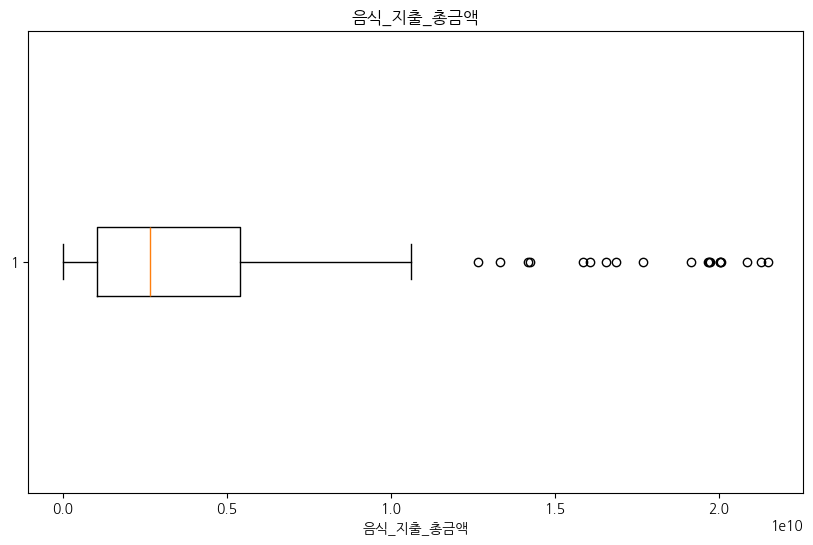

In [9]:
# 그림 그릴 열 선택
column_plot = '음식_지출_총금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(df[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()